# Features Affecting Aviation Satisfaction

### 1. 전체 요약


*   개요 : 비행기 탑승객의 만족 여부 판단하기
*   비행기 탑승객의 신상 정보와 탑승 경험에 대한 설문 조사 결과를 바탕으로 해당 데이터에 대한 5가지 모델을 통해 데이터를 분석하고, 분석한 모델에 대한 평가를 기반으로 성능이 뛰어난 모델을 선정한다. 모델을 학습하기 위해 데이터를 필요한 방식으로 전처리하고,  Feature selection 과정을 포함하여 Feature selection이 모델의 성능에 미치는 영향을 알아본다.



### 2. 데이터 출처 및 선정한 데이터에 대한 설명



*  Airline Passenger Satisfaction
*  URL : https://www.kaggle.com/datasets/binaryjoker/airline-passenger-satisfaction



*   Data Description
    
    항공사는 고객 만족도 측정을 통해 서비스 품질을 개선하려는 노력을 기울인다. 고객 기대를 충족시키기 위해 승객 만족도 측정했으며, 비행 만족도에 영향을 미치는 여러 항목에 대한 설문 데이터이다.

*   Feature Description

    Gender: 탑승객의 성별에 대한 정보

    age : 탑승객의 나이에 대한 정보

    type_of_travel : 탑승 목적에 대한 정보 (Business travel, Personal Travel)
    customer_class : 탑승객의 등급에 대한 정보

    flight_distance : 탑승 거리 정보

    각 항목은 0 점에서 5 점까지로 측정됨

    inflight_wifi_service : 기내 wifi 서비스에 대한 만족도

    departure_arrival_time_convenient : 출발, 도착 시간의 편의성에 대한 만족도

    ease_of_online_booking : 온라인 예약의 편의성에 대한 만족도

    gate_location : 탑승 게이트에 대한 만족도

    food_and_drink : 기내 제공 음식과 음료에 대한 만족도

    online_boarding : 온라인 보딩에 대한 만족도

    seat_comfort : 의자의 안락함에 대한 만족도 

    inflight_entertainment : 비행 간 제공되는 엔터테이먼트의 만족도

    onboard_service : 탑승 간 서비스 만족도

    leg_room_service : 다리 공간에 대한 만족도 

    baggage_handling : 수화물에 대한 만족도

    checkin_service : 체크인 서비스 만족도

    inflight_service : 비행 간 서비스 만족도 

    cleanliness :  청결에 대한 만족도 

    departure_delay_in_minutes : 도착 지연 시간

    arrival_delay_in_minutes : 출발 지연에 시간

*   Class

    satisfaction : 판단하려는 클래스로 비행 전반에 대해 만족했는지 여부 ("neutral or dissatisfied", "satisfie"])

### 3. 실험 설계 및 방법

3.1.   모델 선정

  Perceptron : linear algorithm으로 해당 데이터의 baseline score로 Perceptron을 사용

  Decision Tree : features 간의 상호작용을 파악하는 것이 용이한 모델

  MLP : 일반적으로 높은 성능을 보여주는 classifier로 non-linear 모델인 경우 높은 성능을 보여줄 것을 기대

  RandomForest (앙상블 모델) : Decision Tree 기반의 Random Forest와 다른 앙상블 모델과 비교

  AdaBoost (앙상블 모델) : 가중치를 통해 더 좋은 성능을 가진 모델로 학습하는 방식으로 높은 성능을 기대

### 필요 라이브러리 불러오기

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, chi2

### 3.2. 데이터 전처리

In [102]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 데이터 불러오기

In [103]:
filename = '/content/drive/MyDrive/Colab Notebooks/airline_passenger_satisfaction.csv'
df = pd.read_csv(filename)

### 데이터 확인

In [104]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [105]:
print(df.shape)
print(df.columns)

(129880, 24)
Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')


### 데이터 전처리

In [106]:
# Id feature  drop / 
df = df.drop(columns = ['ID'])

0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                

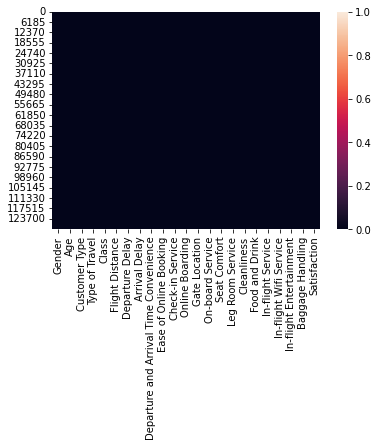

In [107]:
# Duplicate & Missing value 제거
print(df.duplicated().sum())
print(df.isnull().sum())
sns.heatmap(df.isnull())
df = df.dropna()

In [108]:
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

### Correlation

<AxesSubplot:>

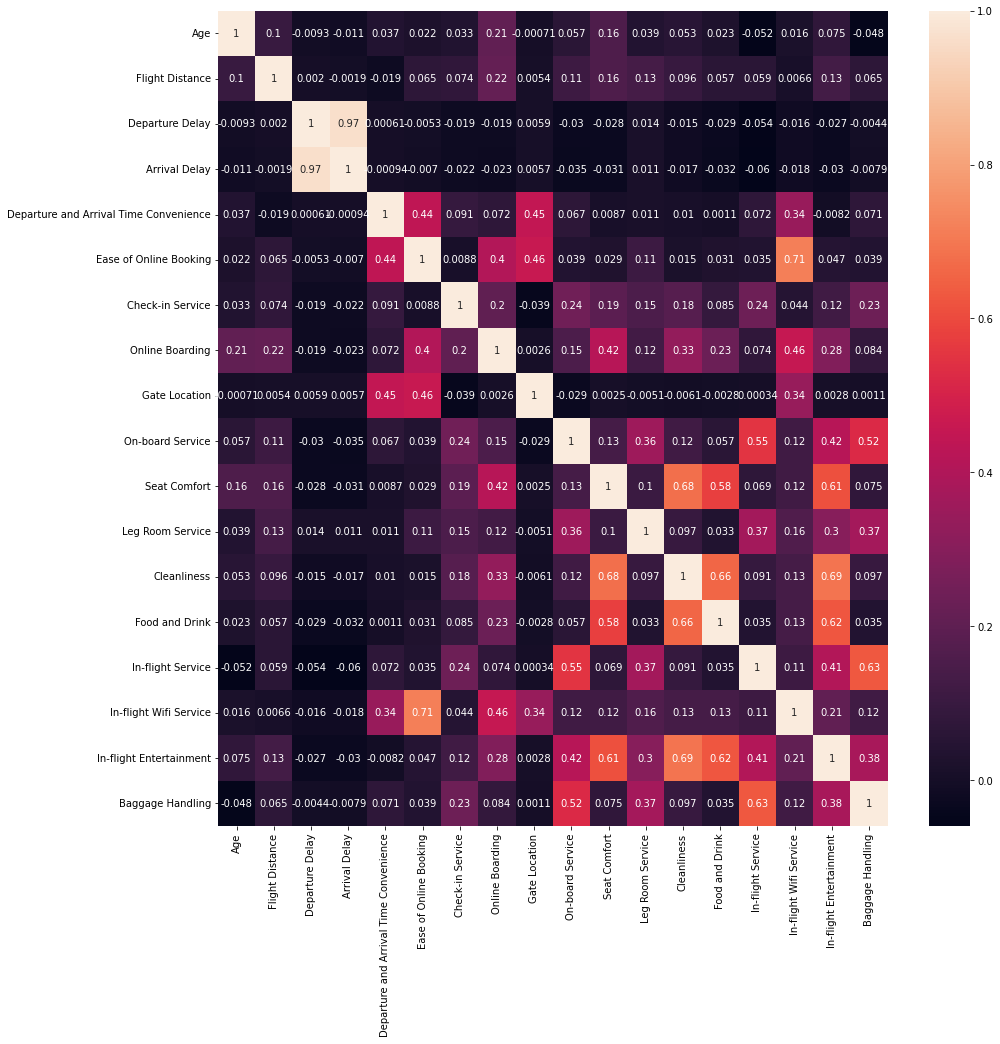

In [109]:
plt.subplots(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)

### Outlier Handling

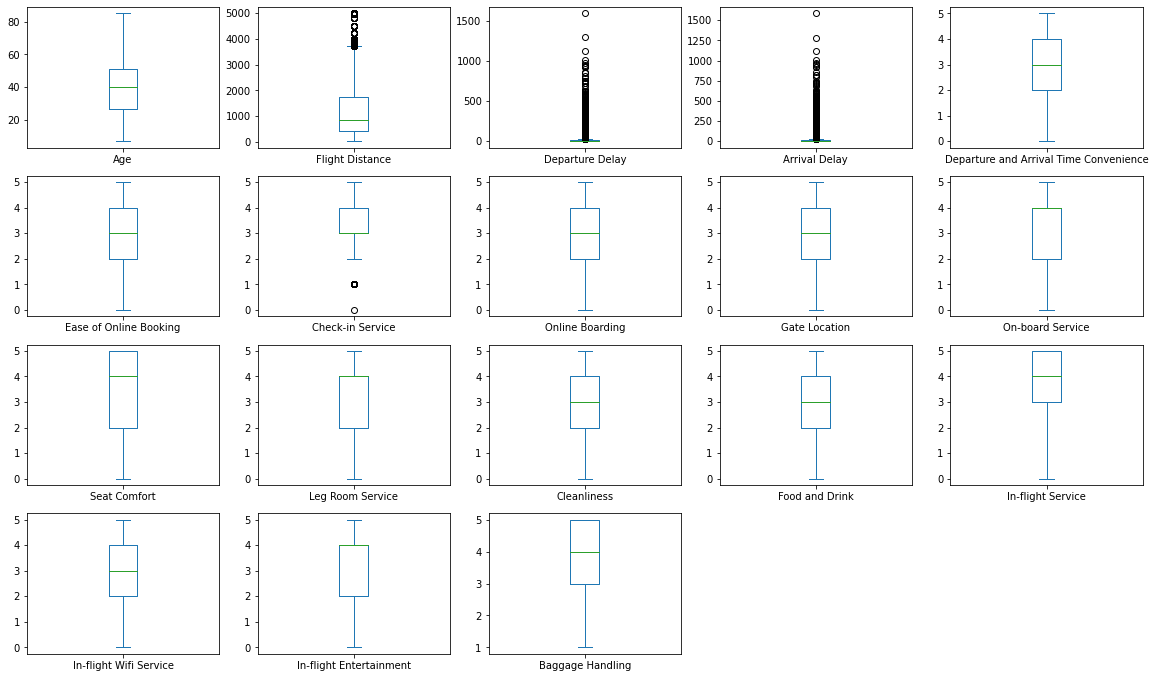

In [110]:
df.plot(kind = "box" , subplots = True , layout= (5,5), figsize =(20,15) )
plt.show()

departure delay , arrival delay, flight distance에서 outlier가 관측된다.

<AxesSubplot:xlabel='Flight Distance', ylabel='Satisfaction'>

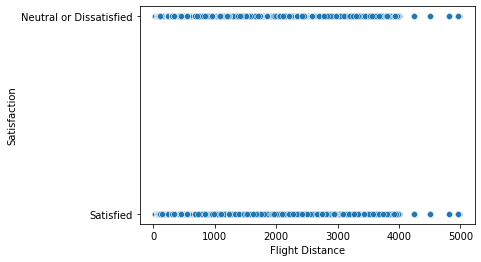

In [111]:
sns.scatterplot(x=df['Flight Distance'],y=df['Satisfaction'])

In [112]:
df=df[df['Flight Distance']<4050]

<AxesSubplot:xlabel='Arrival Delay', ylabel='Satisfaction'>

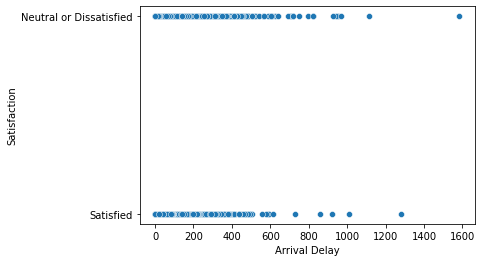

In [113]:
sns.scatterplot(x=df['Arrival Delay'],y=df['Satisfaction'])

In [114]:
df=df[df['Arrival Delay']<650]

<AxesSubplot:xlabel='Departure Delay', ylabel='Satisfaction'>

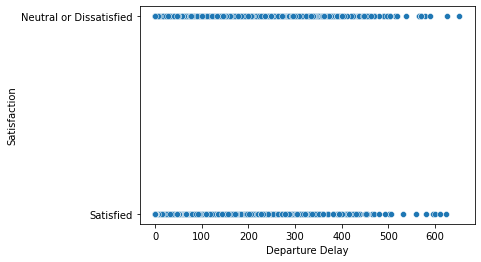

In [115]:
sns.scatterplot(x=df['Departure Delay'],y=df['Satisfaction'])

In [116]:
df=df[df['Departure Delay']<510]

Text(0.5, 1.0, 'Departure Delay')

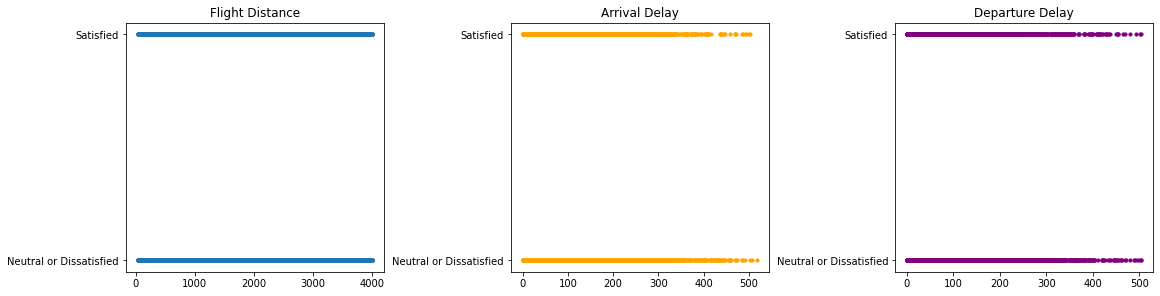

In [117]:
fig, axes = plt.subplots(1,3, constrained_layout=True)
fig.set_size_inches((16, 4)) 

axes[0].scatter(df['Flight Distance'],df['Satisfaction'], s=10)
axes[0].set_title("Flight Distance")

axes[1].scatter(df['Arrival Delay'],df['Satisfaction'], color='orange', s=10)
axes[1].set_title("Arrival Delay")

axes[2].scatter(df['Departure Delay'],df['Satisfaction'], color='purple', s=10)
axes[2].set_title("Departure Delay")

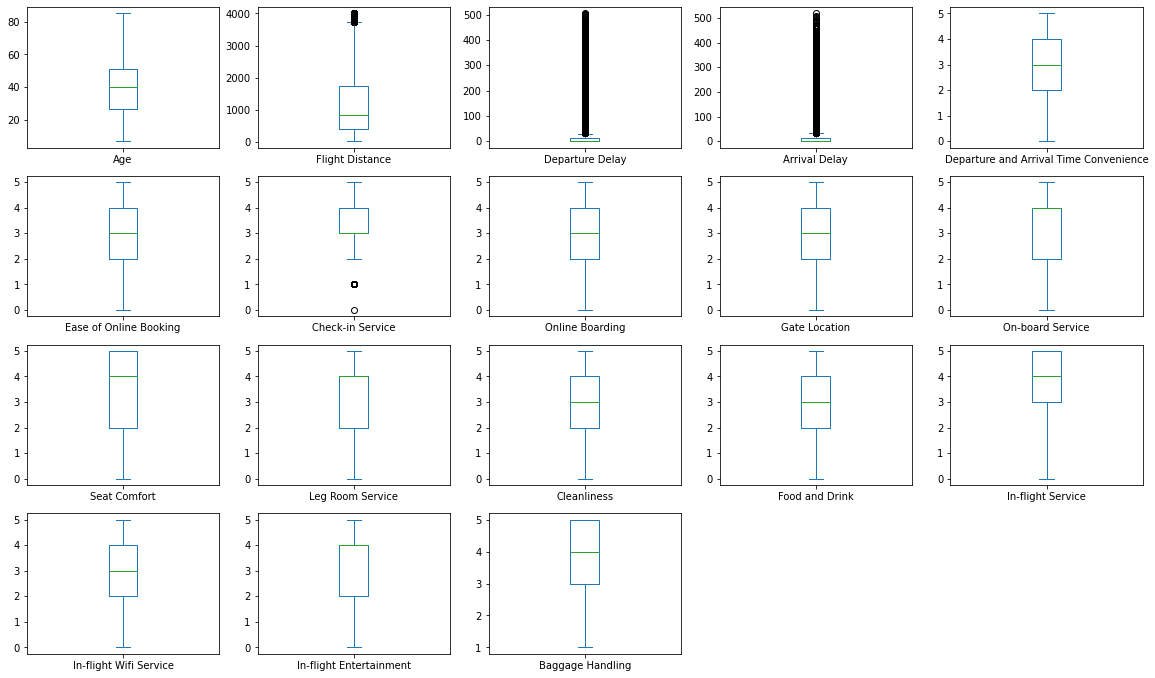

In [118]:
df.plot(kind = "box" , subplots = True , layout= (5,5), figsize =(20,15) )
plt.show()

In [119]:
# 범주형 데이터 전처리
# Gender (Female -> 0 Male -> 1)
df['Gender'] = df['Gender'].replace('Female', 0)
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].astype('int')
# customer_type (disLoyal -> 0 Loyal -> 1 ) -> Loyal 여부
df['Customer Type'] = df['Customer Type'].replace('First-time', 0)
df['Customer Type'] = df['Customer Type'].replace('Returning', 1)
df['Customer Type'] = df['Customer Type'].astype('int')
# type of travel (Business -> 0 personal -> 1) Personal travel 여부
df['Type of Travel'] = df['Type of Travel'].replace('Business', 0)
df['Type of Travel'] = df['Type of Travel'].replace('Personal', 1)
df['Type of Travel'] = df['Type of Travel'].astype('int')
# customer (eco -> 0, eco plus -> 1 Business->2) 좌석 등급에 level이 있다는 가정으로 internal encoding
df['Class'] = df['Class'].replace('Economy', 0)
df['Class'] = df['Class'].replace('Economy Plus', 1)
df['Class'] = df['Class'].replace('Business', 2)
df['Class'] = df['Class'].astype('int')

In [120]:
# float 형 자료 int 형으로 변환
df = df.astype({'Arrival Delay' : 'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129371 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Gender                                  129371 non-null  int64 
 1   Age                                     129371 non-null  int64 
 2   Customer Type                           129371 non-null  int64 
 3   Type of Travel                          129371 non-null  int64 
 4   Class                                   129371 non-null  int64 
 5   Flight Distance                         129371 non-null  int64 
 6   Departure Delay                         129371 non-null  int64 
 7   Arrival Delay                           129371 non-null  int64 
 8   Departure and Arrival Time Convenience  129371 non-null  int64 
 9   Ease of Online Booking                  129371 non-null  int64 
 10  Check-in Service                        129371 non-null 

In [121]:
label = df['Satisfaction']
df = df.drop(['Satisfaction'], axis = 1)

In [134]:
label = label.replace('Neutral or Dissatisfied', 0)
label = label.replace('Satisfied', 1)
label

0         0
1         1
2         1
3         1
4         1
         ..
129875    0
129876    0
129877    0
129878    1
129879    0
Name: Satisfaction, Length: 129371, dtype: int64

### 기본 모델 생성, 훈련 및 평가

In [123]:
# training set, test set 나누기

X_train, X_test, y_train, y_test = train_test_split(df, label, test_size = 0.3)

In [126]:
# Perceptron

perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)
print("Perceptron 기본 모델 성능 : " + str(perceptron.score(X_test, y_test)))

Perceptron 기본 모델 성능 : 0.7744769658868391


In [128]:
# Decision Tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("DecisionTreeClassifier 기본 모델 성능 : " + str(dt.score(X_test, y_test)))

DecisionTreeClassifier 기본 모델 성능 : 0.9474131711841698


In [129]:
# MLP

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("MLPClassifier 기본 모델 성능 : " + str(mlp.score(X_test, y_test)))

MLPClassifier 기본 모델 성능 : 0.9222405441615995


In [130]:
# RandomForest (앙상블 모델)

forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)
print("기본 모델 성능 : " + str(forest.score(X_test, y_test)))

기본 모델 성능 : 0.9508399464083274


In [131]:
# AdaBoost (앙상블 모델) 

ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(X_train, y_train)
print("기본 모델 성능 : " + str(ada.score(X_test, y_test)))

기본 모델 성능 : 0.8845460166958673


### Normalization & Feature Selection 적용하기

In [137]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_N = scaler.fit_transform(df)

In [143]:
XN_train, XN_test, yN_train, yN_test = train_test_split(df_N, label, test_size = 0.3)

In [152]:
selector = SelectKBest(chi2, k = 10)
df_KBest = selector.fit_transform(df_N, label)
XB_train, XB_test, yB_train, yB_test = train_test_split(df_KBest, label, test_size = 0.3)

In [153]:
all_names = X_train.columns

## selector.get_support() 선택된 feature들을 mask처리 해주기
selected_mask = selector.get_support()

## 선택된 특성들
selected_names = all_names[selected_mask]

## 선택되지 않은 특성들 (~ 표시는 not임)
unselected_names = all_names[~selected_mask] 

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['Type of Travel', 'Class', 'Flight Distance', 'Online Boarding',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'In-flight Wifi Service', 'In-flight Entertainment'],
      dtype='object')
Unselected names:  Index(['Gender', 'Age', 'Customer Type', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Gate Location', 'Food and Drink',
       'In-flight Service', 'Baggage Handling'],
      dtype='object')


In [144]:
# Perceptron + (Normalization)

perceptron = Perceptron(random_state=42)
perceptron.fit(XN_train, yN_train)
print("Perceptron 모델 성능 (Normalization) : " + str(perceptron.score(XN_test, yN_test)))

Perceptron 모델 성능 (Normalization) : 0.8029733072245697


In [141]:
# Perceptron + (Normalization & Feature Selection)

perceptron = Perceptron(random_state=42)
perceptron.fit(XB_train, yB_train)
print("Perceptron 모델 성능 (Normalization & Feature Selection) : " + str(perceptron.score(XB_test, yB_test)))

Perceptron 기본 모델 성능 : 0.8086931876739153


In [145]:
# Decision Tree + (Normalization)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(XN_train, yN_train)
print("DecisionTreeClassifier 모델 성능 (Normalization) : " + str(dt.score(XN_test, yN_test)))

DecisionTreeClassifier 모델 성능 (Normalization) : 0.9473874059569205


In [142]:
# Decision Tree + (Normalization & Feature Selection)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(XB_train, yB_train)
print("DecisionTreeClassifier 모델 성능 (Normalization & Feature Selection) : " + str(dt.score(XB_test, yB_test)))

DecisionTreeClassifier 모델 성능 (Normalization & Feature Selection) : 0.9166237246212512


In [146]:
# MLP  + (Normalization)

mlp = MLPClassifier(random_state=42)
mlp.fit(XN_train, yN_train)
print("MLPClassifier 모델 성능 (Normalization) : " + str(mlp.score(XN_test, yN_test)))

MLPClassifier 모델 성능 (Normalization) : 0.9569205400391632


In [147]:
# MLP  + (Normalization & Feature Selection)

mlp = MLPClassifier(random_state=42)
mlp.fit(XB_train, yB_train)
print("MLPClassifier 모델 성능 (Normalization & Feature Selection) : " + str(mlp.score(XB_test, yB_test)))

MLPClassifier 모델 성능 (Normalization & Feature Selection) : 0.9372359064206947


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [148]:
# RandomForest  + (Normalization)

forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(XN_train, yN_train)
print("모델 성능 (Normalization & Feature Selection) : " + str(forest.score(XN_test, yN_test)))

모델 성능 (Normalization & Feature Selection) : 0.9527981036792744


In [149]:
# RandomForest  + (Normalization & Feature Selection)

forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(XN_train, yN_train)
print("모델 성능 (Normalization): " + str(forest.score(XN_test, yN_test)))

모델 성능 (Normalization): 0.9527981036792744


In [150]:
# AdaBoost  + (Normalization)

ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(XN_train, yN_train)
print("기본 모델 성능  (Normalization): " + str(ada.score(XN_test, yN_test)))

기본 모델 성능  (Normalization): 0.8844944862413686


In [151]:
# AdaBoost  + (Normalization & Feature Selection)

ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(XB_train, yB_train)
print("기본 모델 성능 (Normalization & Feature Selection) : " + str(ada.score(XB_test, yB_test)))

기본 모델 성능 (Normalization & Feature Selection) : 0.8847521385138617


Normalization은 성능 향상에 기여하고 있으나 Feature Selection은 성능 향상에 기여하고 있지 않다. 이는 데이터에서 제공하는 대부분의 Feature들이 고객 만족에 미치는 영향이 있음을 의미한다. feature의 수가 20여개로 많은 수가 아니기 때문에 Feature selection이 예측에 기여하는 바가 없을 수 있다.

### 파라미터 변경을 통한 Trial and error

기본 모델과 Nomalized Data 성능이 뛰어난 MLP와 RF에 대한 파라미터 조정

In [161]:
# MLP

mlp_mix = MLPClassifier(activation = "logistic", learning_rate_init = 0.0005, random_state=42)
mlp_mix.fit(XN_train, yN_train)
print("logistic activation과 higher learning rate를 적용한 모델 성능 : " + str(mlp_mix.score(XN_test, yN_test)))

logistic activation과 higher learning rate를 적용한 모델 성능 : 0.9429557868700402


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [163]:
from numpy.lib.function_base import average
from sklearn.model_selection import cross_val_score

scr_mlp = cross_val_score(mlp_mix, XN_train, yN_train, cv = 5)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [164]:
print(average(scr_mlp))

0.9416623426248772


max_iter과 hidden layer의 수를 조정한 결과 모델의 과적합이 일어날 수 있음이 확인되었다. 가장 성능이 높게 만족도 예측에 기여한 모델은 learning rate를 조정하고 activation 함수를 수정한 모델이었따.

In [172]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [None, 25, 50, 75, 100],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [None,0.01, 0.05, 0.1],
    'min_samples_leaf' : [None, 4, 5, 6],
}

In [173]:
from sklearn.model_selection import KFold

estimator = RandomForestClassifier()

kf = KFold(random_state=42,
           n_splits=5,
           shuffle=True,
          )

grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

grid_search.fit(XN_train, yN_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
880 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 6, 9, 12],
                         'min_samples_leaf': [None, 4, 5, 6],
                         'min_samples_split': [None, 0.01, 0.05, 0.1],
                         'n_estimators': [None, 25, 50, 75, 100]},
             verbose=2)

In [175]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 0.01,
 'n_estimators': 100}

In [179]:
forest = RandomForestClassifier(random_state=42)
forest.fit(XN_train, yN_train)
print("모델 성능 : " + str(forest_best.score(XN_test, yN_test)))

모델 성능 : 0.9627692466247553


In [180]:
forest_best = RandomForestClassifier(min_samples_leaf=5,min_samples_split=0.01,n_estimators=100, random_state=42)
forest_best.fit(XN_train, yN_train)
print("모델 성능 : " + str(forest_best.score(XN_test, yN_test)))

모델 성능 : 0.9345563227867669


In [181]:
scr_forest = cross_val_score(forest, XN_train, yN_train, cv = 5)
scr_forest_best = cross_val_score(forest_best, XN_train, yN_train, cv = 5)

print(average(scr_forest))
print(average(scr_forest_best))

0.9499994683355272
0.9353791635913048


#### Estimator 조정 모델 추가

In [183]:
scr_forest_est = cross_val_score(forest_est, XN_train, yN_train, cv = 5)
print(average(scr_forest_est))

0.9611965745492119


Perceptron의 경우 다른 모델과의 비교를 통해 모델의 선형성을 파악하기 좋은 모델이다. Perceptron은 다른 모델과 비교해 성능이 낮다. 비선형 데이터에 대한 분석이 가능한 다른 모델과는 달리 낮은 성능을 보인 것으로 보아 해당 데이터는 비선형적 분석을 위한 모델이 필요하며 Perceptron이 위 데이터를 분석하기 위한 적절한 모델이었다고 할 수 없다.

MLP에서 일반적으로 겪을 수 있는 overfitting의 위험성이 해당 학습에서도 일어났다.

DT 계열의 모델들은 feature selection에서 MLP보다 더 큰 폭으로 성능이 감소했다. DT에서는 학습을 위해 더 많은 features 들을 필요로 함을 시사한다.

Random Forest는 generality를 향상시켜 overfitting 위험을 감소시킨다. 전체 모델을 통틀어 가장 높은 훈련 성능을 보여주고 데이터 정규화 여부로부터 자유로운 특성상 다른 모델처럼 높은 성능 향상을 보여주지는 않았따.

adaBoost의 경우 baseline인 Perceptron을 제외하면 모델 중 가장 낮은 성능을 보였다. 

random forest와 AdaBoost는 모두 decision tree 를 바탕으로 한다. 랜덤 포레스트에서 훈련 데이터는 Bagging 을 기반으로 샘플링된다. Bagging 기법은 원본 data의 다중 세트를 생성하기 위해 반복과 조합을 사용하여 data에서 훈련을 위한 추가 데이터를 생성하여 예측의 분산을 줄이는 데이터 샘플링 기법이다. 이는 교체와 함께 무작위로 데이터를 샘플링하는 것을 포함한다. 즉, 일부 데이터는 여러 번 샘플링되는 반면 다른 데이터는 전혀 샘플링되지 않을 수 있다. 

AdaBoost에서는 node가 하나, leaf가 두 개인 트리를 사용한다, 다음 순번의 Decision tree를 훈련하는 데 사용되는 훈련 데이터는 이전 학습된 Tree의 데이터 세트의 잘못된 분류를 기반으로 더 높은 가중치가 할당된 데이터 샘플이 거의 없다. 잘못 분류된 데이터 샘플 중에서 더 높은 가중치가 할당된 데이터 샘플이 거의 없다는 사실은 새로운 데이터 샘플에서 반복적으로 샘플링된다.

AdaBoost 는 leaf가 2개인 Tree 모델을 통해 학습을 반복하는데 Random Forest에서는 classify하기 위해 여러 features들을 사용하는 반면, AdaBoost는 하나의 feature에 기반한 stump들을 여러 개 학습힌다.

앙상블 모델이 아닌 두 모델의 성능을 비교해보았을 때 Random forest의 경우 두 모델에 비해 성능 향상을 보여준다. 이는 Decision Tree의 성능이 높은 점을 고려해보았을 때 하나의 트리를 통해 학습하는 Decision Tree보다 여러  Tree들을 통해 좋은 학습 성능을 보인 Tree를 선택해 예측하는 Random forest의 특성 상 당연한 것으로 보인다.

반면 AdaBoost는 좋은 성능을 보여주지 못하고 있는데 해당 데이터셋이 여러 feature들을 종합적으로 고려하는 Tree 모델이 해당 데이터를 학습하기 위해 더 적절하다는 점을 추측할 수 있다.

다른 모델과 달리 mlp의 경우 꽤 높은 수준의 성능 향상을 겪은 것을 확인할 수 있다, 이는 학습에 방해가 될 수 있는 feature 들이 데이터에 다소 섞여 있어 MLP의 경우 overfitting 문제를 겪었을 수 있음을 의미한다. 

하지만 일반적으로 다른 모델에서 10개의 best features를 택해서 학습한 모델이 성능 저하를 겪었으므로 10개 이상의 feature들이 항공사 이용 고객들의 만족도에 영향을 미치고 있다고 볼 수 있다. 

MLP의 성능이 Decision Tree와 비교해서 낮게 나타난 것으로 추측해볼 때, feature selection 과정에서 원 데이터의 features보다 적고 10개보다 더 많은 수의 feature를 택해서 학습이 진행되었다면 MLP 성능 향상을 관찰했을 가능성도 있을 것으로 추측된다.

다른 모델에서도 마찬가지로 더 많은 features 들을 이용한 학습에서 성능 향상을 보였을 가능성도 존재한다. 결론적으로 해당 데이터에서는 학습에 부정적인 영향을 미치는 Feature들이 다소 존재하지만 최소 10개 이상의 feature들은 항공사 고객들의 만족도에 영향을 미치는 것으로 추측할 수 있다.

여러 모델들 중 가장 성능이 좋은 모델은 Decision Tree 기반의 Random Forest**(Random Forest Classifier : 0.9611965745492119)**였다.

Feature Selection에서 항공 이용객에게 중요하게 나온 Feature들은 다음과 같다. 데이터 셋을 구성하는 features 는 일반적으로 학습에 관련이 있는 항목으로 이루어졌다고 평가할 수 있다.

`Type of Travel`

`Class`

`Flight Distance`

`Online Boarding`

`On-board Service`

`Seat Comfort`

`Leg Room Service`

`Cleanliness`

`In-flight Wifi Service`

`In-flight Entertainment`
